In [20]:
import os
import numpy as np
import pandas as pd
from random import sample

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, imshow, axis
from matplotlib.image import imread

### Exploratory Data Analysis

In [2]:
# A function to display images.
def display_img(list_of_img):
    fig = figure(figsize=(12, 12))
    rand_list = sample(list_of_img, 6)
    for i in range(6):
        a = fig.add_subplot(1,6,i+1)
        image = imread(rand_list[i])
        imshow(image,cmap='Greys_r')
        axis('off')

In [3]:
# Information about images.
train_img = os.listdir('train_v2')
test_img = os.listdir('test_v2')

img = imread((os.path.join('train_v2','000155de5.jpg')))

print("Number of images in train set:", len(train_img))
print("Number of images in test set:", len(test_img))
print("Shape of the images:", img.shape)

Number of images in train set: 192556
Number of images in test set: 15606
Shape of the images: (768, 768, 3)


In [4]:
# Raw dataframe.
masks = pd.read_csv("train_ship_segmentations_v2.csv")

In [5]:
# Dataframe indicating the presense of a mask.
masks['ships'] = masks['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)

# Dataframe indicating the number of ships in each unique image.
unique_img_ids = masks.groupby('ImageId').agg({'ships': 'sum'}).reset_index()

In [6]:
masks.head()

,ImageId,EncodedPixels,ships
0,00003e153.jpg,NaN,0
1,0001124c7.jpg,NaN,0
2,000155de5.jpg,264661 17 265429 33 266197 33 266965 33 267733...,1
3,000194a2d.jpg,360486 1 361252 4 362019 5 362785 8 363552 10 ...,1
4,000194a2d.jpg,51834 9 52602 9 53370 9 54138 9 54906 9 55674 ...,1


In [7]:
unique_img_ids.head()

,ImageId,ships
0,00003e153.jpg,0
1,0001124c7.jpg,0
2,000155de5.jpg,1
3,000194a2d.jpg,5
4,0001b1832.jpg,0


In [8]:
print("Number of masks (including NaN):", masks.shape[0])
print("Number of unique images:", unique_img_ids['ImageId'].shape[0])
print("Number of images having a mask:", len(unique_img_ids["ImageId"][unique_img_ids["ships"]!=0]))

Number of masks (including NaN): 231723
Number of unique images: 192556
Number of images having a mask: 42556


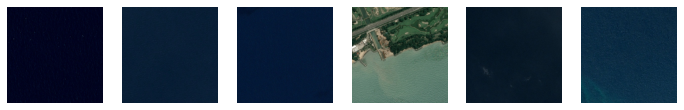

In [9]:
# Images with no ships.
no_ships = unique_img_ids["ImageId"][unique_img_ids['ships']==0]
no_ships_img = ('train_v2/' + no_ships).tolist()
display_img(no_ships_img)

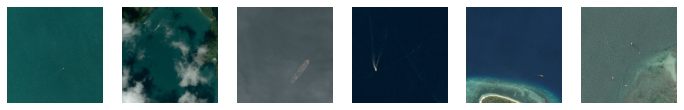

In [10]:
# Images with 1 to 5 ships.
one_to_five_ships = unique_img_ids[(unique_img_ids['ships']>0) & (unique_img_ids['ships']<6)]
one_to_five_ships_img = ('train_v2/' + one_to_five_ships["ImageId"].unique()).tolist()
display_img(one_to_five_ships_img)

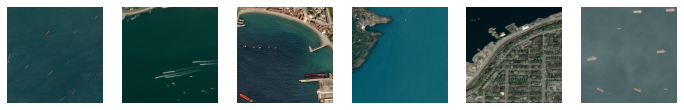

In [11]:
# Images with 10 to 15 ships.
ten_to_fifteen_ships = unique_img_ids[(unique_img_ids['ships']>9)]
ten_to_fifteen_ships_img = ('train_v2/' + ten_to_fifteen_ships["ImageId"].unique()).tolist()
display_img(ten_to_fifteen_ships_img)

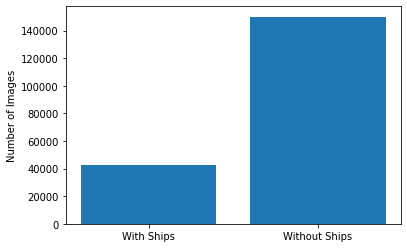

In [12]:
# Class balance.
ships = unique_img_ids["ImageId"][unique_img_ids['ships']!=0]

plt.bar(['With Ships', 'Without Ships'], [len(ships), len(no_ships)])
plt.ylabel('Number of Images')
plt.show()

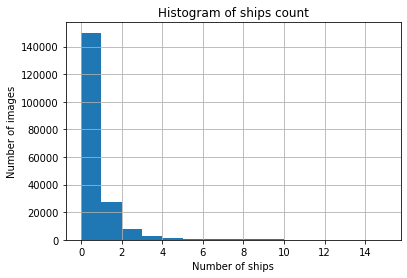

In [13]:
# How often ships appear in images.
unique_img_ids['ships'].hist(bins=unique_img_ids['ships'].max())

plt.title("Histogram of ships count")
plt.xlabel("Number of ships")
plt.ylabel("Number of images")
plt.show()